In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels
import statsmodels.api as sm

In [2]:
#load train dataset
df_train=pd.read_csv('Data_Train.csv')
df_train.head(5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [3]:
#load test dataset
df_test=pd.read_csv('Data_Test.csv')
df_test.head(5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,...,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,...,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,...,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,...,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,...,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [4]:
#lets understand train data

In [5]:
df_train.shape

(87500, 30)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [7]:
#numerical columns
df_train.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [8]:
df_train.describe(include='object')

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
count,87500,87500,87500,87500,86086,87500,87500,87500,87500,87500
unique,7,11,3,5,40354,2,49,2,13,2
top,II,>10yrs,Source Verified,MOR??AGE,School Teacher,whole,California,3 years,debt consolidation,I
freq,24966,30849,34504,44160,1585,46300,12625,60061,52559,87454


In [9]:
#designtion column could be dropped.
df_train.drop('Designation',axis=1,inplace=True)

In [10]:
#check null values
df_miss=pd.DataFrame({"miss_counts":df_train.isnull().sum(),"miss_%":df_train.isnull().sum()/len(df_train)*100})
df_miss[df_miss['miss_%']!=0]

,miss_counts,miss_%
Yearly Income,5575,6.371429
Debt to Income,3489,3.987429
Postal Code,1389,1.587429
Total Unpaid CL,4186,4.784000
Unpaid Amount,4852,5.545143


<AxesSubplot:>

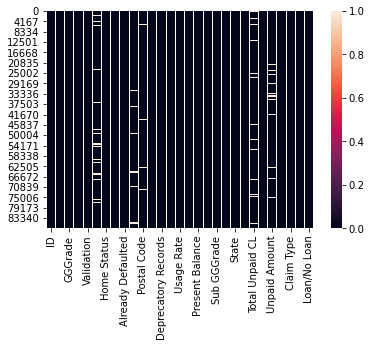

In [11]:
sns.heatmap(df_train.isnull())

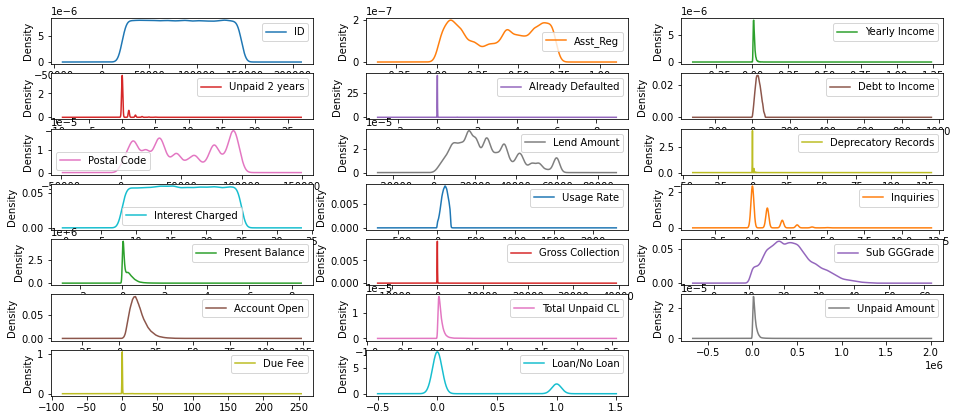

In [12]:
#lets check the distribution 
df_train.plot(kind='kde',subplots=True,layout=(10,3),figsize=(16,10),sharex=False)
plt.show()

In [13]:
df_train.skew()

ID                      0.004884
Asst_Reg               -0.086652
Yearly Income          16.865735
Unpaid 2 years          5.000587
Already Defaulted      20.344502
Debt to Income          1.169490
Postal Code             0.054740
Lend Amount             0.640077
Deprecatory Records    30.987894
Interest Charged        0.000128
Usage Rate              0.343646
Inquiries               1.699121
Present Balance         2.436750
Gross Collection       19.414597
Sub GGGrade             0.550063
Account Open            1.284886
Total Unpaid CL         5.906244
Unpaid Amount           8.868174
Due Fee                16.587386
Loan/No Loan            1.591184
dtype: float64

In [14]:
df_train['Yearly Income']=df_train['Yearly Income'].fillna(df_train['Yearly Income'].median())
df_train['Debt to Income']=df_train['Debt to Income'].fillna(df_train['Debt to Income'].median())
df_train['Postal Code']=df_train['Postal Code'].fillna(df_train['Postal Code'].mean())
df_train['Total Unpaid CL']=df_train['Total Unpaid CL'].fillna(df_train['Total Unpaid CL'].median())
df_train['Unpaid Amount']=df_train['Unpaid Amount'].fillna(df_train['Unpaid Amount'].median())

In [15]:
#lets check missing values
df_train.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [16]:
#lets check unwanted chars
df_train.head(2)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.0,MOR??AGE,0,0,12.5496,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.2,REN?,0,0,9.0048,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0


In [17]:
df_train['Home Status']=df_train['Home Status'].str.replace('?','')

<ipython-input-17-4da6eaead808>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_train['Home Status']=df_train['Home Status'].str.replace('?','')


In [18]:
df_train.head(5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MORAGE,0,0,12.5496,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN,0,0,9.0048,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN,0,0,24.9144,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN,0,0,16.5816,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN,0,0,40.0512,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [19]:
#lets check target var

target=df_train['Loan/No Loan']
target.value_counts()

0    70988
1    16512
Name: Loan/No Loan, dtype: int64

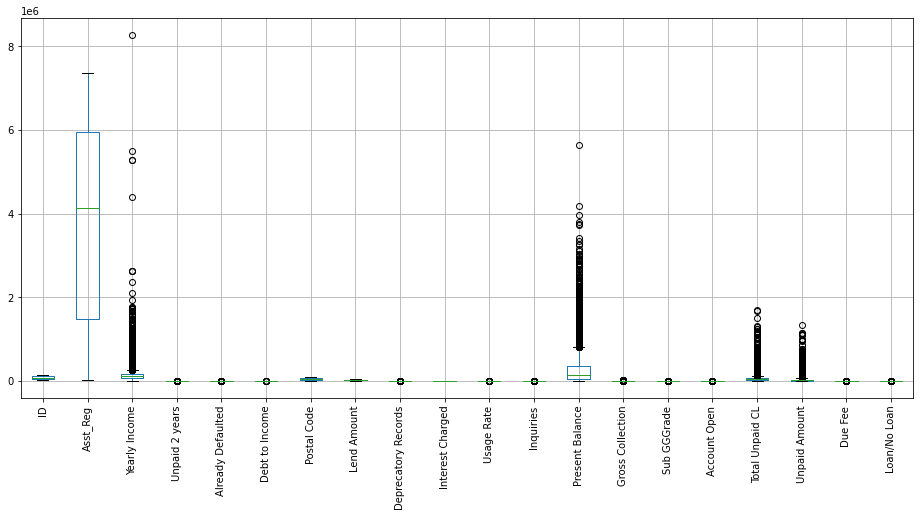

In [20]:
#outliers:

plt.figure(figsize=(16,7))
df_train.boxplot()
plt.xticks(rotation=90);

In [21]:
#lets tranform the values to have normal distribution

In [22]:
df_train[['Asst_Reg','Unpaid 2 years','Debt to Income','Lend Amount','Deprecatory Records','Already Defaulted','Usage Rate','Inquiries','Present Balance','Gross Collection','Sub GGGrade','Account Open','Total Unpaid CL','Unpaid Amount','Due Fee']]=np.sqrt(df_train[['Asst_Reg','Unpaid 2 years','Debt to Income','Lend Amount','Deprecatory Records','Already Defaulted','Usage Rate','Inquiries','Present Balance','Gross Collection','Sub GGGrade','Account Open','Total Unpaid CL','Unpaid Amount','Due Fee']])

In [23]:
df_train.head(2)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,649.462855,II,>10yrs,Vfied,633600.0,MORAGE,0.0,0.0,3.542541,...,fully paid,California,4.123106,242.070238,3 years,176.680644,debt consolidation,I,0.0,0
1,134131,1991.058010,IV,7yrs,Source Verified,85483.2,REN,0.0,0.0,3.000800,...,whole,NC,3.872983,137.564530,5 years,107.983749,debt consolidation,I,0.0,0


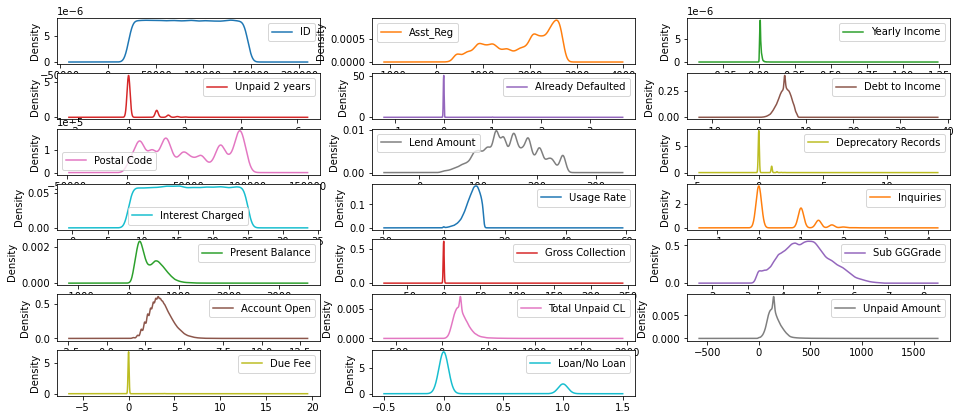

In [24]:
#we can see that after transformation the values get normalised
df_train.plot(kind='kde',subplots=True,layout=(10,3),figsize=(16,10),sharex=False)
plt.show()

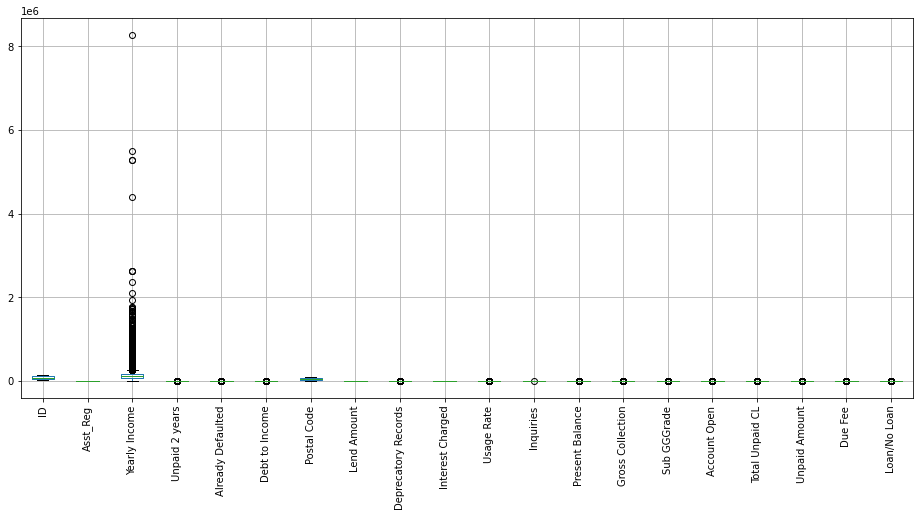

In [25]:
#after tranformation we see that outliers has also treated
plt.figure(figsize=(16,7))
df_train.boxplot()
plt.xticks(rotation=90);

In [26]:
#lets understang tet data
df_test.shape

(37500, 29)

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 non-null  int64  
 14  Interest Charged     37500 non-null  float64
 15  Usage Rate           37500 non-null 

In [28]:
#numerical columns
df_test.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,37500.000000,3.750000e+04,3.507500e+04,37500.000000,37500.000000,35989.00000,36889.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.568600e+04,3.543100e+04,37500.000000
mean,184143.867973,3.804858e+06,1.340308e+05,0.336427,0.005307,30.91903,51233.945078,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,22.031467,12.777787,5.344820e+04,2.928066e+04,0.309792
std,21683.224387,2.284115e+06,1.000845e+05,0.887640,0.077966,13.87167,31250.428604,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,6.481257,5.360527,5.215483e+04,3.560849e+04,3.396315
min,146560.000000,3.752200e+04,8.800000e+03,0.000000,0.000000,0.00000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.000000,3.320000e+02,0.000000e+00,0.000000
25%,165341.250000,1.495828e+06,8.419400e+04,0.000000,0.000000,20.47920,22900.000000,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,17.000000,9.000000,2.324000e+04,1.141425e+04,0.000000
50%,184257.000000,4.134010e+06,1.144000e+05,0.000000,0.000000,30.18960,47800.000000,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,21.000000,12.000000,3.950800e+04,2.068074e+04,0.000000
75%,202869.250000,5.934898e+06,1.584000e+05,0.000000,0.000000,40.72320,80200.000000,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,26.000000,15.000000,6.640000e+04,3.618446e+04,0.000000
max,221557.000000,7.351969e+06,8.800000e+06,18.000000,3.000000,116.50800,99900.000000,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,45.000000,60.000000,1.475408e+06,1.535830e+06,131.490000


In [29]:
df_test.describe(include='object')

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
count,37500,37500,37500,37500,36914,37500,37500,37500,37500,37500
unique,7,11,3,5,19510,2,49,2,13,2
top,III,>10yrs,Source Verified,MOR??AGE,School Teacher,whole,California,3 years,debt consolidation,I
freq,10682,13159,14646,18912,666,19954,5514,25809,22463,37480


In [30]:
#designtion column could be dropped.
df_test.drop('Designation',axis=1,inplace=True)

In [31]:
#check null values
df_miss=pd.DataFrame({"miss_counts":df_test.isnull().sum(),"miss_%":df_test.isnull().sum()/len(df_train)*100})
df_miss[df_miss['miss_%']!=0]

,miss_counts,miss_%
Yearly Income,2425,2.771429
Debt to Income,1511,1.726857
Postal Code,611,0.698286
Total Unpaid CL,1814,2.073143
Unpaid Amount,2069,2.364571


<AxesSubplot:>

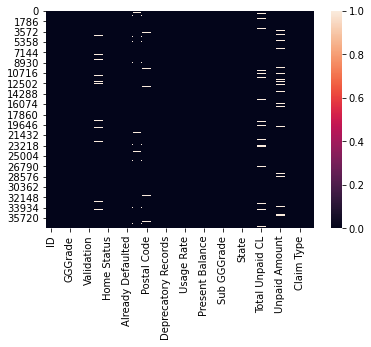

In [32]:
sns.heatmap(df_test.isnull())

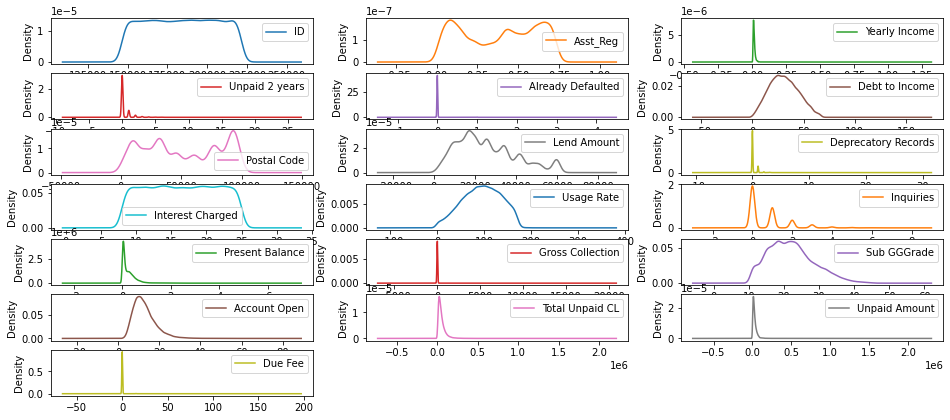

In [33]:
#lets check the distribution 
df_test.plot(kind='kde',subplots=True,layout=(10,3),figsize=(16,10),sharex=False)
plt.show()

In [34]:
df_test.skew()

ID                     -0.006896
Asst_Reg               -0.095395
Yearly Income          23.075748
Unpaid 2 years          4.850818
Already Defaulted      17.070925
Debt to Income          0.224272
Postal Code             0.049429
Lend Amount             0.651859
Deprecatory Records     6.089987
Interest Charged       -0.005107
Usage Rate             -0.160314
Inquiries               1.694417
Present Balance         2.521168
Gross Collection       13.960318
Sub GGGrade             0.547510
Account Open            1.235471
Total Unpaid CL         4.695480
Unpaid Amount           8.443836
Due Fee                15.457493
dtype: float64

In [35]:
df_test['Yearly Income']=df_test['Yearly Income'].fillna(df_train['Yearly Income'].median())
df_test['Debt to Income']=df_test['Debt to Income'].fillna(df_train['Debt to Income'].median())
df_test['Postal Code']=df_test['Postal Code'].fillna(df_train['Postal Code'].mean())
df_test['Total Unpaid CL']=df_test['Total Unpaid CL'].fillna(df_train['Total Unpaid CL'].median())
df_test['Unpaid Amount']=df_test['Unpaid Amount'].fillna(df_train['Unpaid Amount'].median())

In [36]:
df_test.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
dtype: int64

<AxesSubplot:>

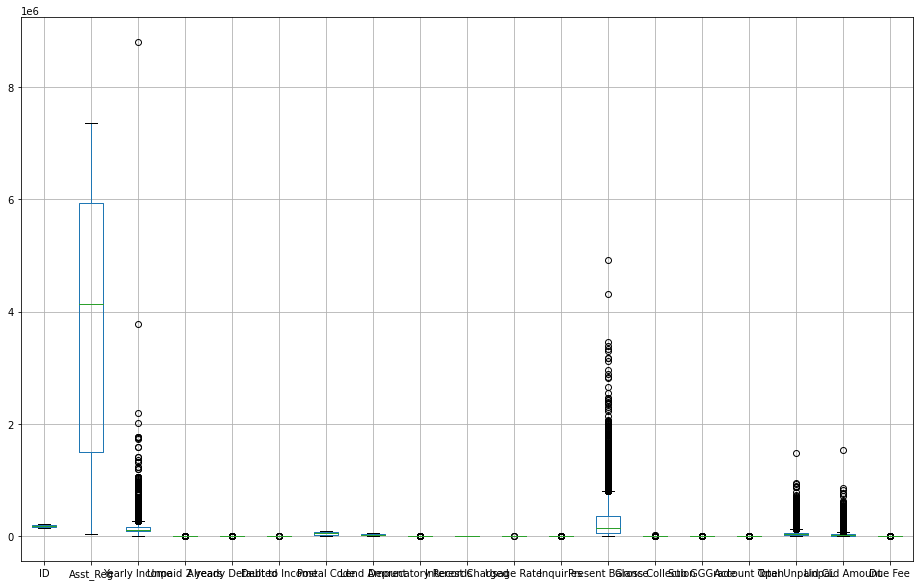

In [37]:
df_test.boxplot(figsize=(16,10))

In [38]:
df_test['Home Status']=df_test['Home Status'].str.replace('?','')

<ipython-input-38-689c625a0404>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_test['Home Status']=df_test['Home Status'].str.replace('?','')


In [39]:
df_test[['Asst_Reg','Unpaid 2 years','Debt to Income','Lend Amount','Deprecatory Records','Usage Rate','Inquiries','Present Balance','Gross Collection','Sub GGGrade','Account Open','Total Unpaid CL','Unpaid Amount','Due Fee','Already Defaulted']]=np.sqrt(df_test[['Asst_Reg','Unpaid 2 years','Debt to Income','Lend Amount','Deprecatory Records','Usage Rate','Inquiries','Present Balance','Gross Collection','Sub GGGrade','Account Open','Total Unpaid CL','Unpaid Amount','Due Fee','Already Defaulted']])

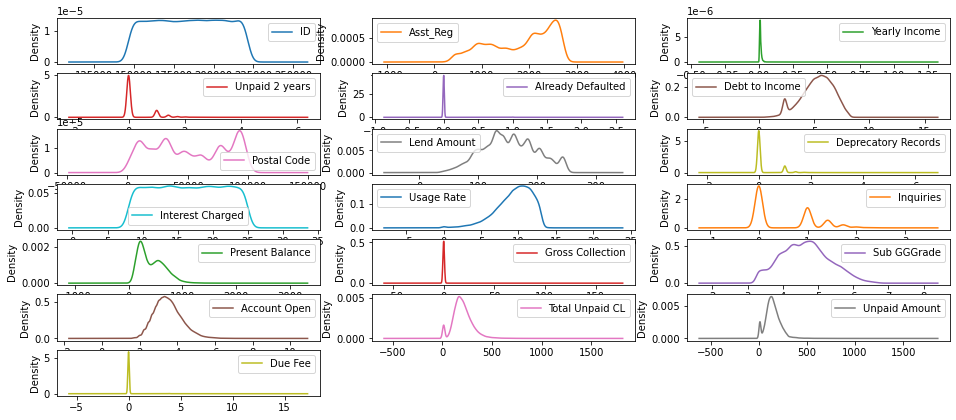

In [40]:
#we can see that after transformation the values get normalised
df_test.plot(kind='kde',subplots=True,layout=(10,3),figsize=(16,10),sharex=False)
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 [Text(1, 0, 'ID'),
  Text(2, 0, 'Asst_Reg'),
  Text(3, 0, 'Yearly Income'),
  Text(4, 0, 'Unpaid 2 years'),
  Text(5, 0, 'Already Defaulted'),
  Text(6, 0, 'Debt to Income'),
  Text(7, 0, 'Postal Code'),
  Text(8, 0, 'Lend Amount'),
  Text(9, 0, 'Deprecatory Records'),
  Text(10, 0, 'Interest Charged'),
  Text(11, 0, 'Usage Rate'),
  Text(12, 0, 'Inquiries'),
  Text(13, 0, 'Present Balance'),
  Text(14, 0, 'Gross Collection'),
  Text(15, 0, 'Sub GGGrade'),
  Text(16, 0, 'Account Open'),
  Text(17, 0, 'Total Unpaid CL'),
  Text(18, 0, 'Unpaid Amount'),
  Text(19, 0, 'Due Fee')])

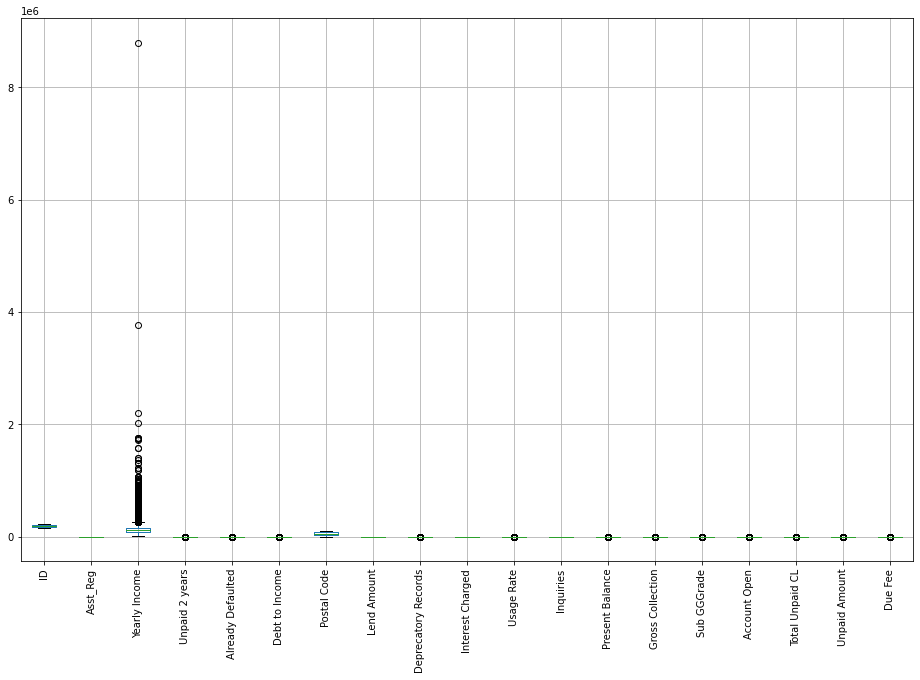

In [41]:
#lets again check outlier after transformation
df_test.boxplot(figsize=(16,10))
plt.xticks(rotation=90)

In [42]:
#EDA-------------------------

In [43]:
df_train.head(5)

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,649.462855,II,>10yrs,Vfied,633600.00,MORAGE,0.0,0.0,3.542541,...,fully paid,California,4.123106,242.070238,3 years,176.680644,debt consolidation,I,0.0,0
1,134131,1991.058010,IV,7yrs,Source Verified,85483.20,REN,0.0,0.0,3.000800,...,whole,NC,3.872983,137.564530,5 years,107.983749,debt consolidation,I,0.0,0
2,92602,2060.960941,III,<1yr,Source Verified,79200.00,REN,0.0,0.0,4.991433,...,whole,Florida,2.645751,124.915972,5 years,75.085751,major purchase,I,0.0,0
3,22591,444.048421,III,<1yr,Vfied,61600.00,REN,0.0,0.0,4.072051,...,fully paid,NewJersey,3.000000,149.699699,3 years,124.928660,major purchase,I,0.0,1
4,125060,2155.616849,V,2yrs,Source Verified,68053.92,REN,0.0,0.0,6.328602,...,fully paid,LA,3.162278,189.794626,5 years,165.749389,debt consolidation,I,0.0,0


In [44]:
#univariant analysis :


C:\Users\Aarohi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Asst_Reg', ylabel='Density'>

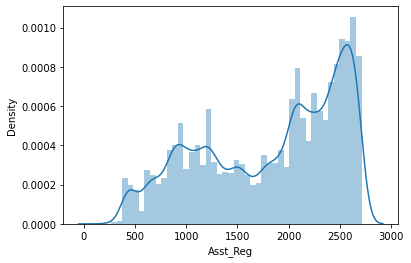

In [45]:
sns.distplot(df_train["Asst_Reg"])

<AxesSubplot:>

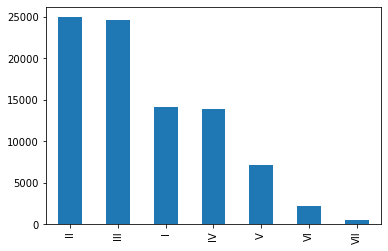

In [46]:
df_train['GGGrade'].value_counts().plot(kind='bar')
#majority of CUSTOMER have III AS GGGRADE
# MINORITY CUTSOMER HAVE VI as grade

<AxesSubplot:ylabel='Experience'>

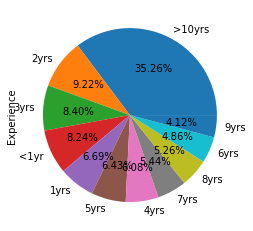

In [47]:
df_train['Experience'].value_counts().plot(kind='pie',autopct="%0.2f%%")
#32.68% of employees have an experience of > 10 yrs 
#8.96% of employyes have <1 yrs of exp

<AxesSubplot:>

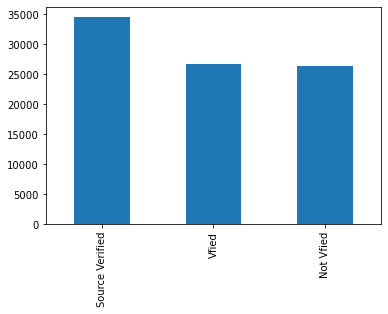

In [48]:
df_train['Validation'].value_counts().plot(kind='bar')
#majority of employyes are source verified 

<AxesSubplot:>

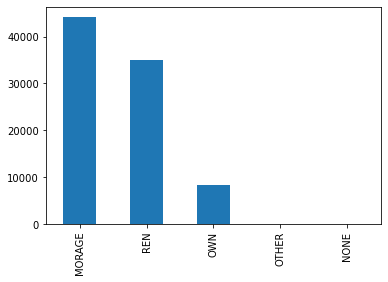

In [49]:
df_train['Home Status'].value_counts().plot(kind='bar')
#majority of employyes have REN as home status follwed up by morage

C:\Users\Aarohi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Income'>

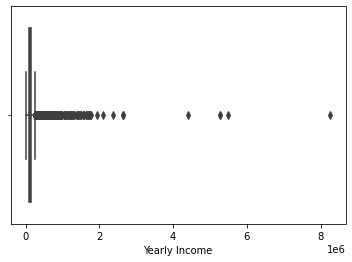

In [50]:
sns.boxplot(df_train['Yearly Income'])
# min yearly income of employees is less than 50000
# max yearly income of employees is around240000

In [51]:
df_train.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'File Status', 'State',
       'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

C:\Users\Aarohi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Unpaid 2 years', ylabel='count'>

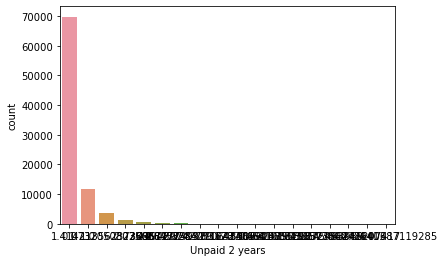

In [52]:
sns.countplot(df_train['Unpaid 2 years'])
# majority of borrowers has deafultes zero times in last two years 

<AxesSubplot:>

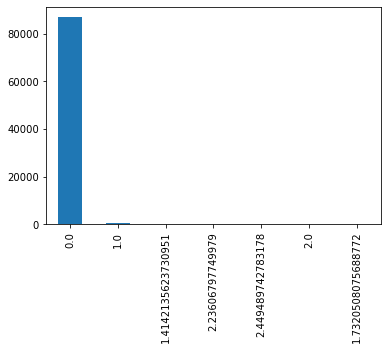

In [53]:
df_train['Already Defaulted'].value_counts().plot(kind='bar')


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  float64
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        87500 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  float64
 8   Already Defaulted    87500 non-null  float64
 9   Debt to Income       87500 non-null  float64
 10  Postal Code          87500 non-null  float64
 11  Lend Amount          87500 non-null  float64
 12  Deprecatory Records  87500 non-null  float64
 13  Interest Charged     87500 non-null  float64
 14  Usage Rate           87500 non-null  float64
 15  Inquiries            87500 non-null 

C:\Users\Aarohi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Account Open'>

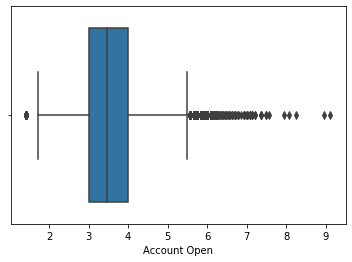

In [55]:
sns.boxplot(df_train['Account Open'])
#minimun open account of borrowers are less than 10 
#maximum open account could reach aroung 80

<AxesSubplot:xlabel='Postal Code', ylabel='Density'>

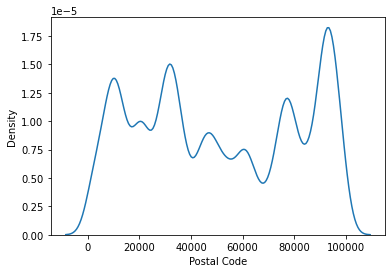

In [56]:
sns.kdeplot(df_train['Postal Code'])

<AxesSubplot:xlabel='Debt to Income', ylabel='Count'>

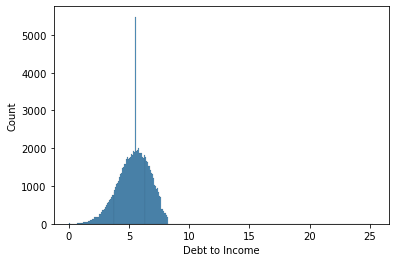

In [57]:
sns.histplot(df_train['Debt to Income'])

C:\Users\Aarohi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present Balance'>

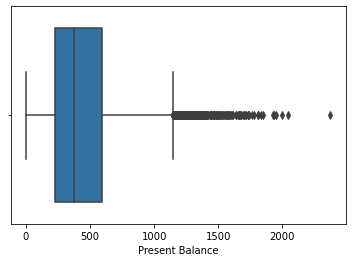

In [58]:
sns.boxplot(df_train['Present Balance'])

<AxesSubplot:>

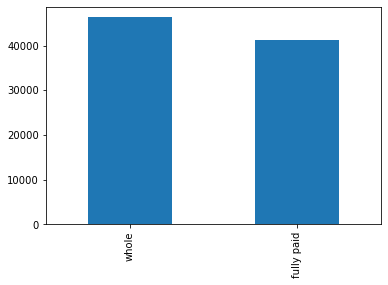

In [59]:
df_train['File Status'].value_counts().plot(kind='bar')

<AxesSubplot:>

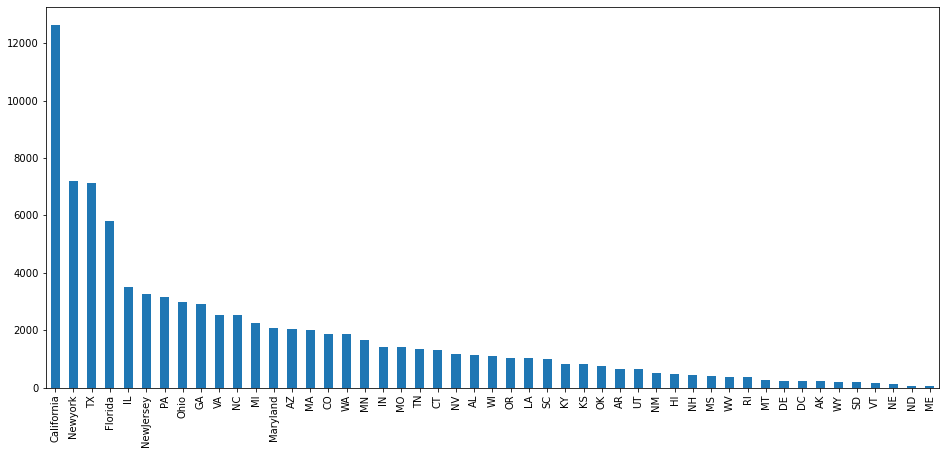

In [60]:
plt.figure(figsize=(16,7))
df_train['State'].value_counts().plot(kind='bar')
#majority of borrowers are from california 
# minority of borrowes are from ME

<AxesSubplot:ylabel='Claim Type'>

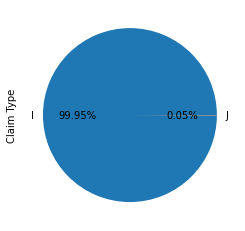

In [61]:
df_train['Claim Type'].value_counts().plot(kind='pie',autopct="%0.2f%%")
#99.95% borrowrs are of Individual account claim type and remaing 0.05 havre claim type of joint account

In [62]:
df_train['Claim Type'].value_counts()

I    87454
J       46
Name: Claim Type, dtype: int64

<AxesSubplot:xlabel='Due Fee', ylabel='Count'>

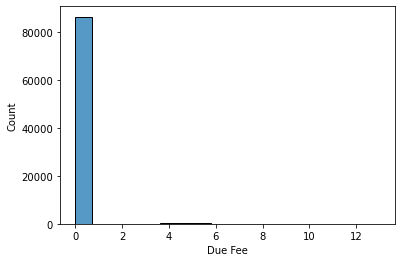

In [63]:
sns.histplot(df_train['Due Fee'])

C:\Users\Aarohi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Present Balance'>

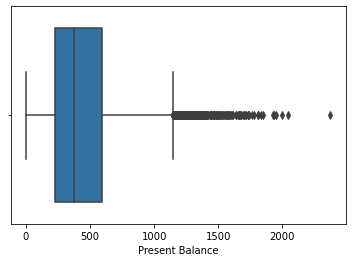

In [64]:
sns.boxplot(df_train['Present Balance'])

<AxesSubplot:>

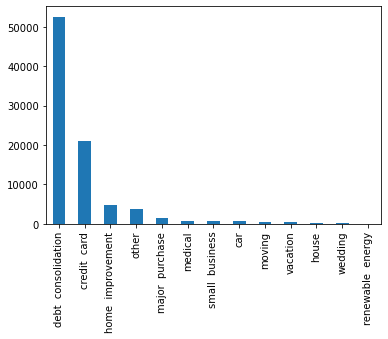

In [65]:
df_train['Reason'].value_counts().plot(kind='bar')
#debt consolidation is the reason for loan application for majority of borrowers

In [66]:
#bivariant analysis

In [67]:
df_train.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'File Status', 'State',
       'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Asst_Reg'>

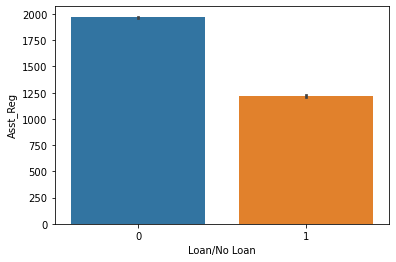

In [68]:
#Asst_Reg vs Loan/No Loan
sns.barplot(x=df_train['Loan/No Loan'],y=df_train['Asst_Reg'])
#

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Yearly Income'>

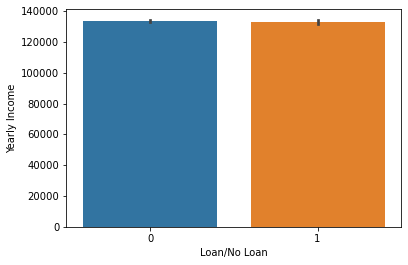

In [69]:
#Yearly Income
sns.barplot(x=df_train['Loan/No Loan'],y=df_train['Yearly Income'])
# yealy inconw sare same for borrowers gaving loan or no loan

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Debt to Income'>

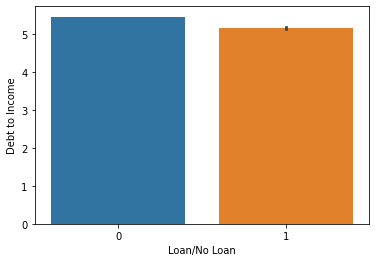

In [70]:
#Debt to Income
sns.barplot(x=df_train['Loan/No Loan'],y=df_train['Debt to Income'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Postal Code'>

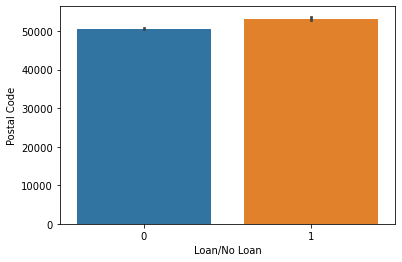

In [71]:
#Postal Code
sns.barplot(x=df_train['Loan/No Loan'],y=df_train['Postal Code'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Lend Amount'>

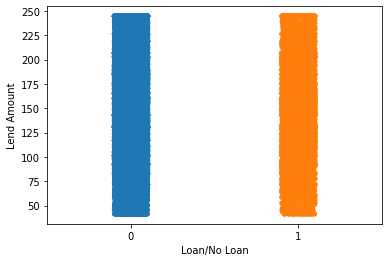

In [72]:
#Lend Amount
sns.stripplot(x=df_train['Loan/No Loan'],y=df_train['Lend Amount'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Deprecatory Records'>

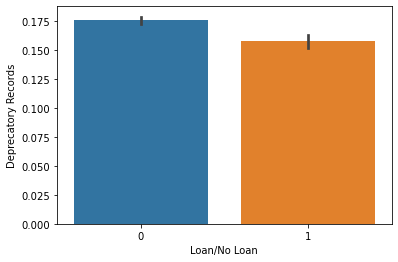

In [73]:
#Deprecatory Records
sns.barplot(x=df_train['Loan/No Loan'],y=df_train['Deprecatory Records'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Interest Charged'>

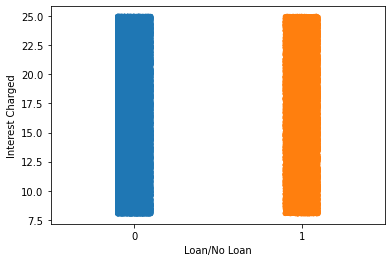

In [74]:
#Interest Charged	
sns.stripplot(x=df_train['Loan/No Loan'],y=df_train['Interest Charged'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Usage Rate'>

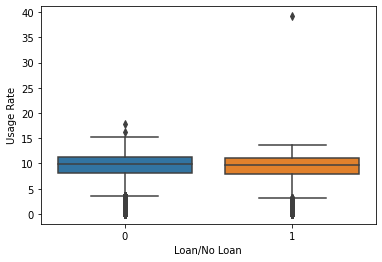

In [75]:
#Usage Rate
sns.boxplot(x=df_train['Loan/No Loan'],y=df_train['Usage Rate'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Present Balance'>

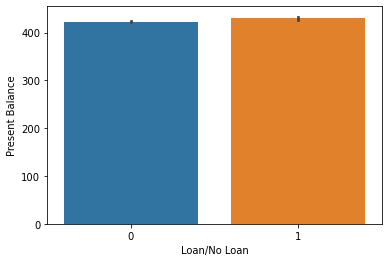

In [76]:
#Present Balance
sns.barplot(x=df_train['Loan/No Loan'],y=df_train['Present Balance'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Account Open'>

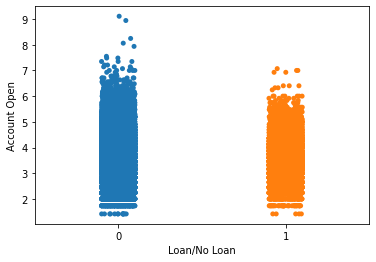

In [77]:
#Account Open
sns.stripplot(x=df_train['Loan/No Loan'],y=df_train['Account Open'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Unpaid Amount'>

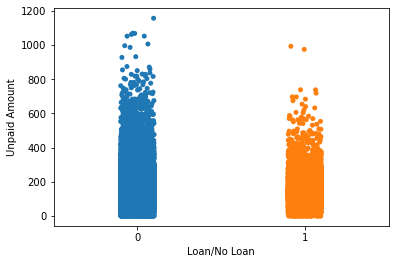

In [78]:
#Unpaid Amount
sns.stripplot(x=df_train['Loan/No Loan'],y=df_train['Unpaid Amount'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Due Fee'>

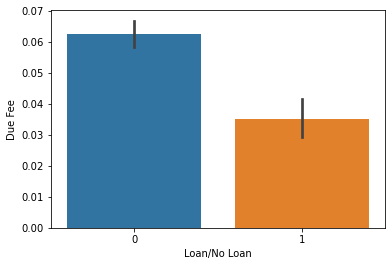

In [79]:
#Due Fee
sns.barplot(x=df_train['Loan/No Loan'],y=df_train['Due Fee'])

<AxesSubplot:xlabel='Loan/No Loan', ylabel='Unpaid 2 years'>

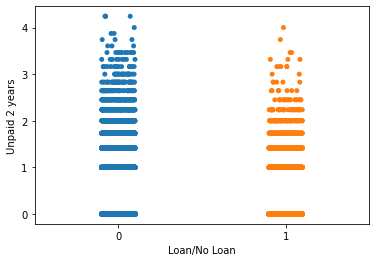

In [80]:
#Unpaid 2 years
sns.stripplot(x=df_train['Loan/No Loan'],y=df_train['Unpaid 2 years'])

In [81]:
cat=df_train.drop('Loan/No Loan',axis=1).select_dtypes('object')

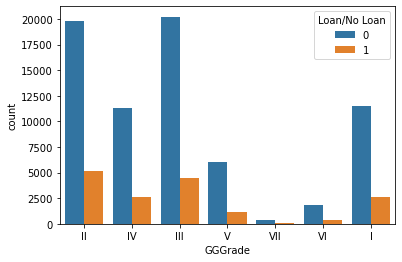

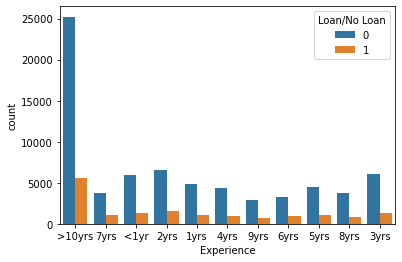

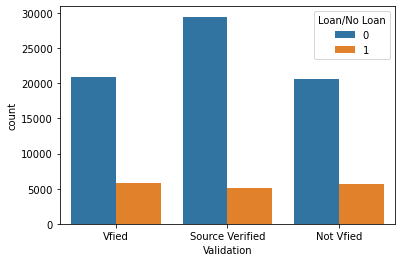

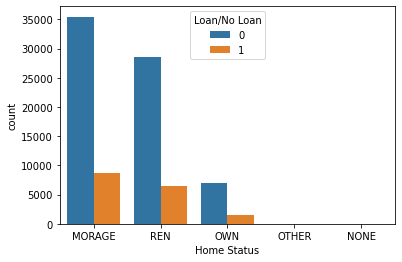

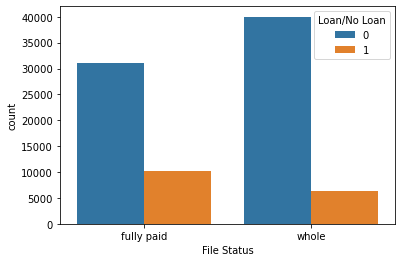

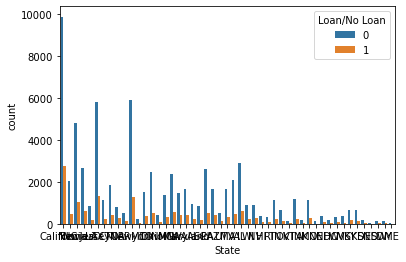

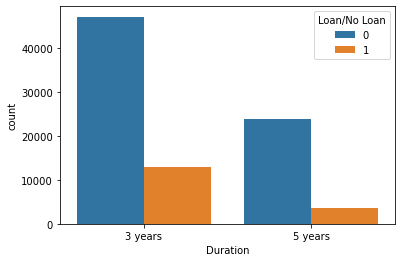

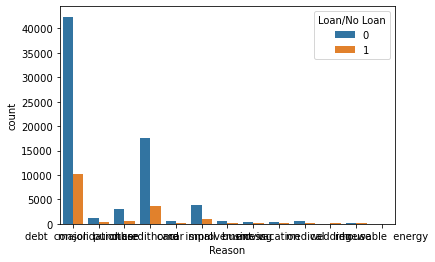

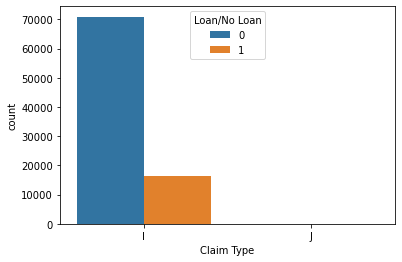

In [82]:
for i in cat :
    sns.countplot(x=df_train[i],hue=df_train['Loan/No Loan'])
    plt.show()

1. GGgrade vs target
in majority, borrowers with no loan belong tp III GGrade where as minority belongs to VII
in majority, borrowers with loan belong tp II GGrade where as minority VI

2. experience vs taget
borrowers having  exp > 10 yrs are mostly have "no loan"

3. validation vs target
Majority of borrowers with no loan are source verified 

4. home status
very few borrowers with loan have own home status as compared to borrowers with no loan 
Majotity of employees have morage home status

5. file status 
majority borrowers with no loan have file stus as fully paid or whole as compare to borrowers with loan

In [83]:
df_train.columns

Index(['ID', 'Asst_Reg', 'GGGrade', 'Experience', 'Validation',
       'Yearly Income', 'Home Status', 'Unpaid 2 years', 'Already Defaulted',
       'Debt to Income', 'Postal Code', 'Lend Amount', 'Deprecatory Records',
       'Interest Charged', 'Usage Rate', 'Inquiries', 'Present Balance',
       'Gross Collection', 'Sub GGGrade', 'File Status', 'State',
       'Account Open', 'Total Unpaid CL', 'Duration', 'Unpaid Amount',
       'Reason', 'Claim Type', 'Due Fee', 'Loan/No Loan'],
      dtype='object')

In [84]:
#States olumns could also be dropeed as its not adding any value 
df_train.drop('State',axis=1,inplace=True)
df_test.drop('State',axis=1,inplace=True)

In [85]:
####train######

In [86]:
ind=df_train.drop('Loan/No Loan',axis=1)
y_train=df_train['Loan/No Loan']


In [87]:
train=ind.select_dtypes(include='number').drop('ID',axis=1)

In [88]:

num_ind=ind.select_dtypes(include='number').drop('ID',axis=1)


#scaling numerical columns 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

num_scaled=pd.DataFrame(ss.fit_transform(num_ind),columns=num_ind.columns)
num_scaled


,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
0,-1.741801,5.222144,-0.476308,-0.072464,-1.419899,1.296563,1.108134,-0.415228,-0.230187,-0.024884,1.916561,1.495417,-0.127203,-0.417503,0.864377,0.342279,0.306729,-0.102714
1,0.241173,-0.502043,-0.476308,-0.072464,-1.833331,-0.767235,0.895336,-0.415228,-1.341982,0.278915,-0.824024,0.398311,-0.127203,1.223920,0.516382,-0.868203,-0.649534,-0.102714
2,0.344494,-0.567660,-0.476308,-0.072464,-0.314173,-0.592830,-0.517104,-0.415228,1.189646,-0.733341,-0.824024,-1.156586,-0.127203,0.523472,-1.191068,-1.014710,-1.107476,-0.102714
3,-2.045419,-0.751464,-0.476308,-0.072464,-1.015802,-1.426100,-1.812038,-0.415228,-1.256303,0.552546,0.758254,-1.268109,-0.127203,0.069080,-0.698201,-0.727642,-0.413661,-0.102714
4,0.484403,-0.684063,-0.476308,-0.072464,0.706292,0.634468,-0.309869,-0.415228,-0.579026,0.765464,0.758254,-0.710379,-0.127203,1.487569,-0.472424,-0.263225,0.154566,-0.102714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87495,0.446221,-0.604421,-0.476308,-0.072464,-0.768997,-0.101910,-1.162466,-0.415228,-1.666341,-0.999068,0.758254,-1.270538,-0.127203,-0.763588,-0.052496,-0.366981,-0.759830,-0.102714
87496,-0.307136,-0.450449,-0.476308,-0.072464,1.208894,-1.606965,0.241374,-0.415228,1.562964,0.801118,-0.824024,-0.437113,-0.127203,0.951325,1.800342,-0.382992,0.044823,-0.102714
87497,0.908773,-0.438998,-0.476308,-0.072464,-1.992686,-1.445479,-1.355699,3.753427,-1.119623,-0.151423,0.758254,-1.279463,-0.127203,-0.944276,-0.936911,-0.487401,-0.475443,-0.102714
87498,-0.304420,-0.751464,-0.476308,-0.072464,-1.924884,-1.109587,-0.004652,1.991546,1.224326,-0.834069,0.758254,-0.762309,-0.127203,0.523472,-0.257681,-0.633847,-0.872767,-0.102714


In [89]:
train_id=df_train['ID'].copy()

In [90]:
cat_ind=ind.select_dtypes(include='object')
dummy=pd.get_dummies(cat_ind,drop_first=True)
dummy.head(5)

,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,...,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
x_train=pd.concat([num_scaled,dummy],axis=1)
x_train.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,...,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J
0,-1.741801,5.222144,-0.476308,-0.072464,-1.419899,1.296563,1.108134,-0.415228,-0.230187,-0.024884,...,0,0,0,0,0,0,0,0,0,0
1,0.241173,-0.502043,-0.476308,-0.072464,-1.833331,-0.767235,0.895336,-0.415228,-1.341982,0.278915,...,0,0,0,0,0,0,0,0,0,0
2,0.344494,-0.567660,-0.476308,-0.072464,-0.314173,-0.592830,-0.517104,-0.415228,1.189646,-0.733341,...,0,1,0,0,0,0,0,0,0,0
3,-2.045419,-0.751464,-0.476308,-0.072464,-1.015802,-1.426100,-1.812038,-0.415228,-1.256303,0.552546,...,0,1,0,0,0,0,0,0,0,0
4,0.484403,-0.684063,-0.476308,-0.072464,0.706292,0.634468,-0.309869,-0.415228,-0.579026,0.765464,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#test

In [93]:
num_ind_test=df_test.select_dtypes(include='number').drop('ID',axis=1)
test_id=df_test['ID']
#scaling numerical columns 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
num_scaled_test=pd.DataFrame((num_ind_test-np.mean(num_ind))/np.std(num_ind))

num_scaled_test


,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
0,-0.733484,0.075651,-0.476308,-0.072464,-0.984475,1.273955,-0.446399,-0.415228,-1.558221,-0.269756,0.758254,-0.758098,-0.127203,-0.763588,1.800342,-0.340567,-0.405392,-0.102714
1,0.700469,0.130792,-0.476308,-0.072464,-0.035406,-0.608978,1.976201,-0.415228,-1.309342,-0.319820,0.758254,1.288227,-0.127203,-0.417503,0.864377,2.012976,1.483564,-0.102714
2,-2.057849,0.717106,-0.476308,-0.072464,1.334932,1.189982,1.976201,-0.415228,0.567449,1.307527,1.413654,0.476440,-0.127203,2.112696,0.516382,0.607720,1.430832,-0.102714
3,-0.872939,-0.291955,1.443324,-0.072464,-0.156883,-1.009465,-0.336685,-0.415228,-1.570461,-1.603234,1.413654,0.957910,-0.127203,-0.417503,1.030686,0.797751,-0.414328,-0.102714
4,0.402308,0.185933,-0.476308,-0.072464,-1.664389,-0.525005,0.105857,1.991546,-0.611666,0.396738,0.758254,0.325924,-0.127203,0.523472,-1.191068,-1.110217,-0.843081,-0.102714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,0.850178,1.821782,1.443324,-0.072464,0.016915,1.309482,1.976201,-0.415228,0.536849,-0.968411,2.340531,2.092678,-0.127203,1.088797,1.192437,1.754137,1.190555,-0.102714
37496,-0.938052,0.259454,-0.476308,-0.072464,0.166634,-1.022384,0.297526,-0.415228,0.510329,1.434678,0.758254,1.515767,-0.127203,0.951325,0.333668,0.178644,1.003088,-0.102714
37497,-0.666770,-0.843365,-0.476308,-0.072464,1.107000,1.280414,-1.845057,1.991546,0.440970,-0.888112,1.916561,-0.871970,-0.127203,1.616303,-0.698201,-1.395847,-1.418216,-0.102714
37498,-0.524965,-0.843365,3.816120,-0.072464,1.166523,-0.457181,-0.664031,1.991546,-1.233863,0.959984,0.758254,-0.405910,-0.127203,2.467587,-0.698201,-0.939692,-1.985317,-0.102714


In [94]:
cat_ind_test=df_test.select_dtypes(include='object')
dummy_test=pd.get_dummies(cat_ind_test,drop_first=True)
dummy_test.head(5)

,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,GGGrade_VI,GGGrade_VII,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,...,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
x_test=pd.concat([num_scaled_test,dummy_test],axis=1)
x_test.head(10)

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,...,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J
0,-0.733484,0.075651,-0.476308,-0.072464,-0.984475,1.273955,-0.446399,-0.415228,-1.558221,-0.269756,...,0,1,0,0,0,0,0,0,0,0
1,0.700469,0.130792,-0.476308,-0.072464,-0.035406,-0.608978,1.976201,-0.415228,-1.309342,-0.319820,...,0,0,0,0,0,0,0,0,0,0
2,-2.057849,0.717106,-0.476308,-0.072464,1.334932,1.189982,1.976201,-0.415228,0.567449,1.307527,...,0,0,0,0,0,0,0,0,0,0
3,-0.872939,-0.291955,1.443324,-0.072464,-0.156883,-1.009465,-0.336685,-0.415228,-1.570461,-1.603234,...,0,0,0,0,0,0,0,0,0,0
4,0.402308,0.185933,-0.476308,-0.072464,-1.664389,-0.525005,0.105857,1.991546,-0.611666,0.396738,...,0,0,0,0,0,0,0,0,0,0
5,0.883466,-0.769844,2.238462,-0.072464,1.643493,-1.316289,-1.355699,-0.415228,-1.123703,-1.584098,...,0,0,0,0,1,0,0,0,0,0
6,0.811877,0.443258,3.362956,-0.072464,1.558028,0.350252,-0.819374,-0.415228,-0.022108,0.768716,...,0,0,0,0,0,0,0,0,0,0
7,1.205836,0.259454,-0.476308,-0.072464,2.064186,0.000000,1.094415,-0.415228,-1.533741,0.732820,...,0,0,0,0,0,0,0,0,0,0
8,0.207461,-0.567660,-0.476308,-0.072464,0.349745,-1.548830,-0.270078,1.991546,-1.415422,1.098774,...,0,0,0,0,0,0,0,0,0,0
9,-0.039247,-0.475759,2.848592,-0.072464,1.064739,0.460063,0.668848,-0.415228,0.334890,0.165234,...,0,0,0,0,0,0,0,0,0,0


In [96]:
#modelling:
x_train.head()

,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,...,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Claim Type_J
0,-1.741801,5.222144,-0.476308,-0.072464,-1.419899,1.296563,1.108134,-0.415228,-0.230187,-0.024884,...,0,0,0,0,0,0,0,0,0,0
1,0.241173,-0.502043,-0.476308,-0.072464,-1.833331,-0.767235,0.895336,-0.415228,-1.341982,0.278915,...,0,0,0,0,0,0,0,0,0,0
2,0.344494,-0.567660,-0.476308,-0.072464,-0.314173,-0.592830,-0.517104,-0.415228,1.189646,-0.733341,...,0,1,0,0,0,0,0,0,0,0
3,-2.045419,-0.751464,-0.476308,-0.072464,-1.015802,-1.426100,-1.812038,-0.415228,-1.256303,0.552546,...,0,1,0,0,0,0,0,0,0,0
4,0.484403,-0.684063,-0.476308,-0.072464,0.706292,0.634468,-0.309869,-0.415228,-0.579026,0.765464,...,0,0,0,0,0,0,0,0,0,0


In [97]:
base_modle=LogisticRegression()
base_modle.fit(x_train,y_train)

C:\Users\Aarohi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
train_pred=base_modle.predict(x_train)
test_pred=base_modle.predict(x_test)

In [99]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     70988
           1       0.63      0.35      0.45     16512

    accuracy                           0.84     87500
   macro avg       0.74      0.65      0.68     87500
weighted avg       0.82      0.84      0.82     87500



In [100]:
#here we see that model is more biased towards majority class(0) so it says that model is not best model ,we can further apply imbalance handling techniques 

In [101]:
df_train['Loan/No Loan'].value_counts()

0    70988
1    16512
Name: Loan/No Loan, dtype: int64

In [102]:
pip install imblearn

In [ ]:
ind=df_train.drop('Loan/No Loan',axis=1)
y_train=df_train['Loan/No Loan']

In [ ]:

num_ind=ind.select_dtypes(include='number').drop('ID',axis=1)


#scaling numerical columns 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

num_scaled=pd.DataFrame(ss.fit_transform(num_ind),columns=num_ind.columns)
num_scaled

In [ ]:
cat_ind=ind.select_dtypes(include='object')
dummy=pd.get_dummies(cat_ind,drop_first=True)
dummy.head(5)

In [ ]:
x_train=pd.concat([num_scaled,dummy],axis=1)
x_train.head()

In [103]:
#lets try SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 16512
Before OverSampling, counts of label '0': 70988 

After OverSampling, the shape of train_X: (141976, 55)
After OverSampling, the shape of train_y: (141976,) 

After OverSampling, counts of label '1': 70988
After OverSampling, counts of label '0': 70988


In [104]:
#smote algo oversampled the minority instances and made it equal to majority class.
#Lets check the score after SMOTE

In [145]:
smote_model=LogisticRegression()
smote_model.fit(x_train_res,y_train_res)

C:\Users\Aarohi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
train_pred=base_modle.predict(x_train_res)

In [147]:
print(classification_report(y_train_res,train_pred))

              precision    recall  f1-score   support

           0       0.60      0.95      0.73     70988
           1       0.88      0.36      0.51     70988

    accuracy                           0.65    141976
   macro avg       0.74      0.65      0.62    141976
weighted avg       0.74      0.65      0.62    141976



In [109]:
score_card = pd.DataFrame(columns=['Model Name','F1-Score'])
def update_scorecard(name,f1):
    global score_card
    score_card = score_card.append({'Model Name':name,  'F1-Score':f1,},
                                  ignore_index=True)

In [110]:
update_scorecard("Logistoc smote model",0.62)

In [148]:
#lets calculate optimal threshold vlaue 
train_prob=smote_model.predict_proba(x_train_res)
train_prob=train_prob[:,1]


In [149]:
fpr,tpr,thresh=roc_curve(y_train_res,train_prob)
df_roc=pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresh':np.round(thresh,4)})
df_roc['youden']=df_roc['tpr']-df_roc['fpr']
df_roc.sort_values(by='youden',ascending=False)

,tpr,fpr,thresh,youden
14258,0.824421,0.147363,0.5225,0.677058
14260,0.824435,0.147377,0.5224,0.677058
14259,0.824421,0.147377,0.5225,0.677044
14262,0.824463,0.147447,0.5224,0.677016
14246,0.824167,0.147166,0.5228,0.677002
...,...,...,...,...
31976,1.000000,0.973531,0.0078,0.026469
31975,0.999986,0.973531,0.0078,0.026455
1,0.000014,0.000000,1.0000,0.000014
0,0.000000,0.000000,2.0000,0.000000


In [150]:
roc_auc_score(y_train_res,train_prob)

0.920326774111492

In [151]:
train_pred=[0 if t <0.5225 else 1 for t in train_prob]
print(classification_report(y_train_res,train_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     70988
           1       0.85      0.82      0.84     70988

    accuracy                           0.84    141976
   macro avg       0.84      0.84      0.84    141976
weighted avg       0.84      0.84      0.84    141976



In [157]:
test_prob=smote_model.predict_proba(x_test)
test_prob=test_prob[:,1]
test_prob

array([0.15911186, 0.0820701 , 0.77358083, ..., 0.70966577, 0.18103694,
       0.33728823])

In [160]:
test_pred=[0 if t <0.5225 else 1 for t in test_prob]


In [162]:
data=pd.DataFrame({'ID':test_id,'Loan/NoLoan':test_pred})
data.to_csv("C:/Users/Aarohi/Desktop/AAROHI\hackathon.csv")

In [115]:
update_scorecard("Logistoc smote model -youden",0.84)

In [ ]:
#Decision Tree

In [116]:
DT_model=DecisionTreeClassifier()
DT_model.fit(x_train_res,y_train_res)


DecisionTreeClassifier()

In [117]:
train_pred=DT_model.predict(x_train_res)
print(classification_report(y_train_res,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70988
           1       1.00      1.00      1.00     70988

    accuracy                           1.00    141976
   macro avg       1.00      1.00      1.00    141976
weighted avg       1.00      1.00      1.00    141976



In [118]:
#lets hyper tune the data to avoid overfitting

In [125]:
tuned_params = [{'criterion': ['entropy', 'gini'],
                'max_depth': range(2,14),
                 'min_samples_split':range(3,10),
                'max_leaf_nodes':range(2,10)}]

                     
dt_grid=GridSearchCV(estimator=DecisionTreeClassifier(random_state=10,),
                     param_grid=tuned_params,cv=5,scoring='f1')
dt_grid.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': range(2, 14),
                          'max_leaf_nodes': range(2, 10),
                          'min_samples_split': range(3, 10)}],
             scoring='f1')

In [129]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_split': 3}

In [130]:
dt_tuned = dt_grid.best_estimator_

In [131]:
dt_tuned.fit(x_train_res,y_train_res)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_split=3,
                       random_state=10)

In [132]:
train_pred=dt_tuned.predict(x_train_res)
print(classification_report(y_train_res,train_pred))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71     70988
           1       0.69      0.88      0.78     70988

    accuracy                           0.75    141976
   macro avg       0.77      0.75      0.74    141976
weighted avg       0.77      0.75      0.74    141976



In [134]:
update_scorecard("DECISION TREE TUNED",0.74)

In [138]:

train_prob=dt_tuned.predict_proba(x_train_res)
train_prob=train_prob[:,1]
fpr,tpr,thresh=roc_curve(y_train_res,train_prob)
df_roc=pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresh':np.round(thresh,4)})
df_roc


,tpr,fpr,thresh
0,0.000000,0.000000,1.8049
1,0.579281,0.140418,0.8049
2,0.884220,0.388911,0.5510
3,1.000000,0.981997,0.1633
4,1.000000,1.000000,0.0000


In [139]:
df_roc['youden']=df_roc['tpr']-df_roc['fpr']
df_roc.sort_values(by='youden',ascending=False)

,tpr,fpr,thresh,youden
2,0.884220,0.388911,0.5510,0.495309
1,0.579281,0.140418,0.8049,0.438863
3,1.000000,0.981997,0.1633,0.018003
0,0.000000,0.000000,1.8049,0.000000
4,1.000000,1.000000,0.0000,0.000000


In [141]:
train_pred=[0 if t <0.55 else 1 for t in train_prob]
print(classification_report(y_train_res,train_pred))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71     70988
           1       0.69      0.88      0.78     70988

    accuracy                           0.75    141976
   macro avg       0.77      0.75      0.74    141976
weighted avg       0.77      0.75      0.74    141976



<AxesSubplot:>

<Figure size 720x504 with 0 Axes>

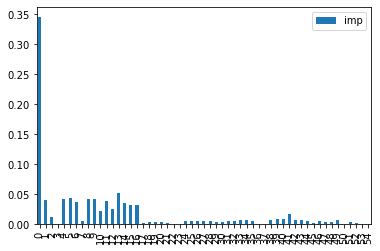

In [144]:
#lets check feature importance 

data=pd.DataFrame({'features':x_train_res.columns,'imp':DT_model.feature_importances_})
plt.figure(figsize=(10,7))
data.plot(kind='bar')

In [ ]:
#random forest

In [121]:
random_base_model=RandomForestClassifier(random_state=10)
random_base_model=random_base_model.fit(x_train_res,y_train_res)

In [122]:
train_pred=random_base_model.predict(x_train_res)
print(classification_report(y_train_res,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70988
           1       1.00      1.00      1.00     70988

    accuracy                           1.00    141976
   macro avg       1.00      1.00      1.00    141976
weighted avg       1.00      1.00      1.00    141976



In [124]:
## Tuning the model

tuned_params = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 30, 50, 70, 90],
                     'max_depth': range(2,14,4)}]

                     
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=10,),
                     param_grid=tuned_params,cv=5,scoring='f1')
rf_grid.fit(x_train_res,y_train_res)

rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 70}

In [126]:
#lets build the model using tuned params
rf_tune=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)
rf_tune.fit(x_train_res,y_train_res)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       random_state=10)

In [127]:
train_pred=rf_tune.predict(x_train_res)
print(classification_report(y_train_res,train_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80     70988
           1       0.78      0.85      0.81     70988

    accuracy                           0.80    141976
   macro avg       0.81      0.80      0.80    141976
weighted avg       0.81      0.80      0.80    141976



In [128]:

train_prob=rf_tune.predict_proba(x_train_res)
train_prob=train_prob[:,1]
fpr,tpr,thresh=roc_curve(y_train_res,train_prob)
df_roc=pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresh':np.round(thresh,4)})
df_roc


,tpr,fpr,thresh
0,0.000000,0.000000,1.9315
1,0.000014,0.000000,0.9315
2,0.000085,0.000000,0.9266
3,0.000113,0.000000,0.9262
4,0.000169,0.000000,0.9256
...,...,...,...
45117,0.999972,0.961303,0.0975
45118,0.999986,0.961303,0.0975
45119,0.999986,0.979095,0.0871
45120,1.000000,0.979095,0.0871


In [135]:
update_scorecard("RANDOM FOREST TUNED",0.80)